In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import accuracy_score 
import datetime
from time import sleep
from random import randint
import nltk
from bs4 import BeautifulSoup
from selenium import webdriver
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tag import pos_tag
from nltk.tokenize import WordPunctTokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression

/Users/alnick06/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/alnick06/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
Df=pd.read_csv('movie.csv')

In [4]:
Df.columns

Index(['Unnamed: 0', 'Actors', 'Awards', 'Country', 'Director', 'Episode',
       'Error', 'Genre', 'Language', 'Metascore', 'Plot', 'Poster', 'Rated',
       'Released', 'Response', 'Runtime', 'Season', 'Title', 'Type', 'Writer',
       'Year', 'imdbID', 'imdbRating', 'imdbVotes', 'seriesID',
       'totalSeasons'],
      dtype='object')

In [5]:
Df.drop(['Season','seriesID','totalSeasons','Episode','Unnamed: 0'],axis=1,inplace=True)

In [6]:
Df.info()# Here I had to make some decisons for missing data what to fill and what to drop

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9942 entries, 0 to 9941
Data columns (total 21 columns):
Actors        9753 non-null object
Awards        6997 non-null object
Country       9780 non-null object
Director      9670 non-null object
Error         152 non-null object
Genre         9768 non-null object
Language      9755 non-null object
Metascore     4545 non-null float64
Plot          9720 non-null object
Poster        9595 non-null object
Rated         8615 non-null object
Released      9560 non-null object
Response      9942 non-null bool
Runtime       9620 non-null object
Title         9790 non-null object
Type          9790 non-null object
Writer        9566 non-null object
Year          9790 non-null object
imdbID        9790 non-null object
imdbRating    9654 non-null float64
imdbVotes     9653 non-null object
dtypes: bool(1), float64(2), object(18)
memory usage: 1.5+ MB


In [7]:
# for x in Df:
#     if x=='Error getting data.':
#         Df.drop(axis=0,inplace=True)
#     else:
#         pass
# Df

In [8]:
df = Df[~Df['Error'].isin(['Error getting data.'])]

In [9]:
df.reset_index(inplace=True,drop=True)

In [10]:
df.drop(['Type','Poster','Error','imdbID'],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9790 entries, 0 to 9789
Data columns (total 17 columns):
Actors        9753 non-null object
Awards        6997 non-null object
Country       9780 non-null object
Director      9670 non-null object
Genre         9768 non-null object
Language      9755 non-null object
Metascore     4545 non-null float64
Plot          9720 non-null object
Rated         8615 non-null object
Released      9560 non-null object
Response      9790 non-null bool
Runtime       9620 non-null object
Title         9790 non-null object
Writer        9566 non-null object
Year          9790 non-null object
imdbRating    9654 non-null float64
imdbVotes     9653 non-null object
dtypes: bool(1), float64(2), object(14)
memory usage: 1.2+ MB


In [12]:
df.dropna(subset=['Plot','Actors'],inplace=True)

In [13]:
print(df['Actors'].isnull().any())
print(df['Actors'].isnull().any())

False
False


In [14]:
df.loc[df['Metascore'].idxmin()]['Title']

'Bio-Dome'

In [15]:
print(df.loc[df['Metascore'].idxmax()]['Title'])
print(df.loc[df['Metascore'].idxmax()]['Director'])

The Wizard of Oz
Victor Fleming, George Cukor, Mervyn LeRoy, Norman Taurog, King Vidor


In [16]:
print(df.loc[df['imdbRating'].idxmax()]['Title'])
print(df.loc[df['imdbRating'].idxmax()]['Director'])

Till We Meet Again
Bank Tangjaitrong


In [17]:
print(df.loc[df['imdbRating'].idxmin()]['Title'])
print(df.loc[df['imdbRating'].idxmin()]['Director'])

Proud American
Fred Ashman


In [18]:
print(df.loc[df['Metascore'].idxmin()]['Title'])
print(df.loc[df['Metascore'].idxmin()]['Director'])

Bio-Dome
Jason Bloom


In [19]:
df.loc[df['imdbRating'].idxmax()]['Director']

'Bank Tangjaitrong'

In [20]:
df['Director'].value_counts()

Woody Allen                                39
Clint Eastwood                             29
Steven Spielberg                           28
Martin Scorsese                            24
Sidney Lumet                               23
Joel Schumacher                            23
Ron Howard                                 23
Ridley Scott                               22
Brian De Palma                             21
Michael Apted                              21
Steven Soderbergh                          21
Stephen Frears                             21
Barry Levinson                             21
Spike Lee                                  20
Walter Hill                                20
Robert Altman                              19
Wes Craven                                 19
Blake Edwards                              18
Herbert Ross                               18
Tim Burton                                 18
David Cronenberg                           18
John Carpenter                    

In [21]:
df['Runtime'].describe()

count       9559
unique       206
top       90 min
freq         367
Name: Runtime, dtype: object

In [22]:
df['Runtimes']=df['Runtime'].fillna('101') #The most frequent 

In [23]:
templist=[]
for x in df['Runtimes']:
    try:
        templist.append(x.strip('min').strip(' '))
            
    except:
        pass
    
df['Runtimes']=templist
# df.drop(['Runtime'],axis=1,inplace=True)    

In [24]:
df['Runtimes']= list(map(int,df['Runtimes']))

In [25]:
df.columns

Index(['Actors', 'Awards', 'Country', 'Director', 'Genre', 'Language',
       'Metascore', 'Plot', 'Rated', 'Released', 'Response', 'Runtime',
       'Title', 'Writer', 'Year', 'imdbRating', 'imdbVotes', 'Runtimes'],
      dtype='object')

In [26]:
# df.drop(['Awards','Metascore'],axis=1,inplace=True)

In [27]:
# df.drop(['Country'],axis=1,inplace=True)

In [28]:
# df.drop(['Rated'],axis=1,inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9687 entries, 0 to 9789
Data columns (total 18 columns):
Actors        9687 non-null object
Awards        6971 non-null object
Country       9681 non-null object
Director      9587 non-null object
Genre         9671 non-null object
Language      9665 non-null object
Metascore     4543 non-null float64
Plot          9687 non-null object
Rated         8605 non-null object
Released      9492 non-null object
Response      9687 non-null bool
Runtime       9559 non-null object
Title         9687 non-null object
Writer        9481 non-null object
Year          9687 non-null object
imdbRating    9587 non-null float64
imdbVotes     9586 non-null object
Runtimes      9687 non-null int64
dtypes: bool(1), float64(2), int64(1), object(14)
memory usage: 1.7+ MB


In [30]:
df.dropna(subset=['imdbVotes'],inplace=True) #Dropped NaN values

In [31]:
lister1=[]
for x in df['imdbVotes']:
        lister1.append(x.replace(',',''))
df['imdbVotes']=lister1

In [32]:
df['imdbvotes']= list(map(int,df['imdbVotes'])) #Changing imdbVotes to integers

In [33]:
df.drop(['imdbVotes'],axis=1,inplace=True)

In [34]:
df.dropna(subset=['Genre'],inplace=True) #Dropping NaNs from Genre 

In [35]:
df['imdbRating']= list(map(float,df['imdbRating']))#Converting strings to floats of imdbRating

In [36]:
df.drop(['Response'],axis=1,inplace=True)

In [37]:
df.reset_index(drop=True,inplace=True)

In [38]:
pltdf=df.filter(['Plot','imdbRating'], axis=1)

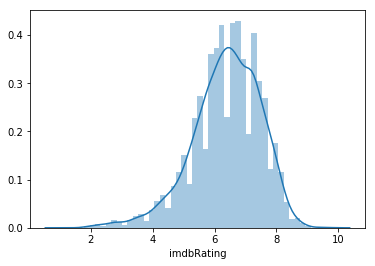

In [39]:
sns.distplot(pltdf['imdbRating'])

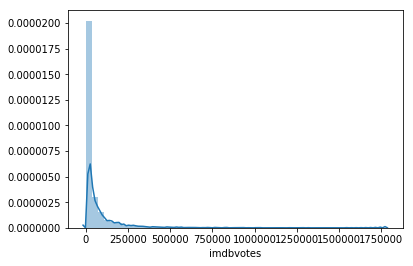

In [40]:
sns.distplot(df['imdbvotes'])

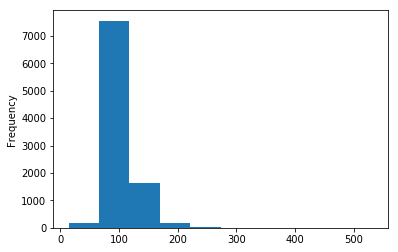

In [41]:
df['Runtimes'].plot(kind='hist', bins=10)

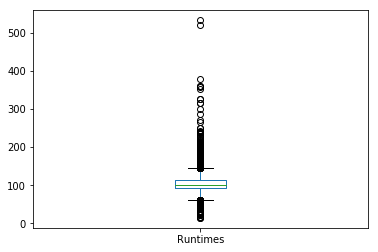

In [42]:
df['Runtimes'].plot(kind='box')

Text(0,0.5,'Title Count')

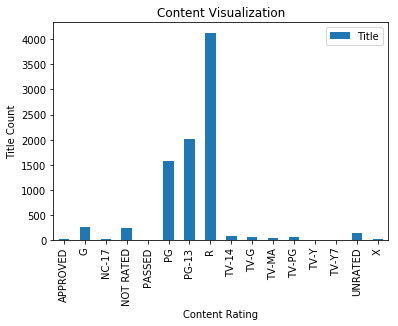

In [43]:
df[['Rated','Title']].groupby('Rated').count().plot(kind='bar', title='Content Visualization')
plt.xlabel('Content Rating')
plt.ylabel('Title Count')

In [44]:
df['Year'].value_counts()[:20]#Seems to descend with the years with most movies being the most recent.

2008    385
2012    376
2007    366
2006    358
2011    353
2009    347
2010    328
2005    324
2002    306
2003    296
2000    280
2004    269
2001    268
1999    256
1998    246
1996    242
1993    236
1997    228
1995    224
1988    214
Name: Year, dtype: int64

In [45]:
df[["Director", "imdbRating"]].groupby(['Director'], as_index=False).median().sort_values(by='imdbRating', ascending=False)#Dumb

,Director,imdbRating
284,Bank Tangjaitrong,9.80
1327,George Veras,9.50
1540,Jack Kenny,9.10
587,Chris Bould,8.80
3488,Scott Goldstein,8.80
2224,Kirk Browning,8.70
1004,Don Mischer,8.70
3173,Ricardo de Montreuil,8.70
1898,John Glenister,8.70
3038,"Peter Jones, Mark A. Catalena",8.70


In [46]:
df['Genre'].value_counts()

Drama                             522
Comedy                            446
Comedy, Drama, Romance            396
Drama, Romance                    336
Comedy, Drama                     335
Comedy, Romance                   273
Action, Crime, Drama              238
Crime, Drama, Thriller            184
Crime, Drama, Mystery             158
Horror                            155
Crime, Drama                      130
Drama, Thriller                   130
Horror, Thriller                  126
Biography, Drama                  125
Action, Comedy, Crime             123
Action, Adventure, Comedy         118
Animation, Adventure, Comedy      118
Biography, Drama, History         116
Documentary, Biography            110
Action, Crime, Thriller           109
Comedy, Crime                     107
Action, Adventure, Sci-Fi          98
Comedy, Crime, Drama               95
Action, Adventure, Drama           93
Horror, Mystery, Thriller          84
Action, Adventure, Fantasy         84
Biography, C

In [47]:
df[df['Genre']=='Drama']['imdbRating'].mean()

6.959578544061307

In [48]:
df[["Genre", "imdbRating"]].groupby(['Genre'], as_index=False).median().sort_values(by='imdbRating', ascending=False)

,Genre,imdbRating
536,"Music, Musical",8.80
348,"Documentary, Animation, Action",8.70
542,"Musical, Drama, Thriller",8.50
196,"Animation, Short, Adventure",8.40
535,Music,8.35
178,"Animation, Comedy, Romance",8.30
345,"Documentary, Action, Biography",8.20
124,"Adventure, Drama, War",8.20
197,"Animation, Short, Comedy",8.20
344,"Documentary, Action, Adventure",8.20


In [49]:
thegenres=[]
for x in df['Genre']:
    if (',') in x:
        thegenres.append(x.split(',')[1])
    else:
        pass
        thegenres.append(x)
df['Genre']=thegenres
   

In [50]:
df['Rated'].value_counts()

R            4136
PG-13        2013
PG           1580
G             257
NOT RATED     243
UNRATED       133
TV-14          67
TV-G           49
TV-PG          45
TV-MA          30
NC-17          23
X              12
APPROVED        8
TV-Y7           2
PASSED          2
TV-Y            1
Name: Rated, dtype: int64

In [51]:
df[["Rated", "imdbRating"]].groupby(['Rated'], as_index=False).mean().sort_values(by='imdbRating', ascending=False)

,Rated,imdbRating
13,TV-Y7,8.000000
4,PASSED,7.950000
12,TV-Y,7.900000
10,TV-MA,7.516667
0,APPROVED,7.300000
11,TV-PG,6.993333
8,TV-14,6.965672
3,NOT RATED,6.716872
14,UNRATED,6.648872
2,NC-17,6.613043


In [52]:
pltdf.describe()

,imdbRating
count,9571.00000
mean,6.37926
std,1.10489
min,1.10000
25%,5.70000
50%,6.50000
75%,7.20000
max,9.80000


In [53]:
# pltdf.loc[pltdf['imdbRating'] <= 6.5, 'imdbRating'] 						        = 0
# pltdf.loc[(pltdf['imdbRating'] > 6.5) & (pltdf['imdbRating'] <= 9.8), 'imdbRating'] = 1
# pltdf['imdbRating'] = pltdf['imdbRating'].astype(int)

In [54]:
pltdf['imdbRating'].value_counts()

6.4    384
6.5    374
6.7    366
7.2    359
6.2    358
6.8    350
6.1    346
6.3    343
6.6    333
5.9    327
7.1    326
7.3    315
7.0    293
6.9    290
7.4    280
6.0    274
5.8    273
5.7    272
5.6    242
7.6    237
7.5    229
5.5    213
7.7    212
7.8    203
5.4    201
5.3    180
5.2    152
8.0    150
7.9    143
5.1    139
      ... 
3.6     25
3.8     24
3.7     21
8.6     18
3.3     17
8.7     16
2.7     15
3.4     14
2.8     13
8.8     11
3.1     11
3.0     11
2.9     10
3.2     10
2.3      8
2.6      8
2.4      7
2.2      6
9.0      5
8.9      4
2.0      4
2.1      4
1.9      4
2.5      4
9.5      3
1.8      1
1.1      1
9.3      1
9.1      1
9.8      1
Name: imdbRating, Length: 78, dtype: int64

In [55]:
pltdf['Plot']

0       Jules Winnfield (Samuel L. Jackson) and Vincen...
1       When New York is put under siege by Oscorp, it...
2       Chronicles the experiences of a formerly succe...
3       Luke Skywalker joins forces with a Jedi Knight...
4       Marty McFly, a 17-year-old high school student...
5       Beyond being in the same class at Shermer High...
6       Mikey Walsh and Brandon Walsh are brothers who...
7       FBI trainee Clarice Starling works hard to adv...
8       Huge advancements in scientific technology hav...
9       A young lion Prince is cast out of his pride b...
10      A film about two homicide detectives' (Morgan ...
11      A little boy named Andy loves to be in his roo...
12      "The Dude" Lebowski, mistaken for a millionair...
13      Opening with the Allied invasion of Normandy o...
14      An insomniac office worker, looking for a way ...
15      Thomas A. Anderson is a man living two lives. ...
16      The evil Trade Federation, led by Nute Gunray ...
17      When a

In [131]:
filler=[]
import random
for x in range (83):
    filler.append(random.choice(df['Director'][x:]))


In [133]:
df.loc[df.Director.isnull(), 'Director'] = filler

In [134]:
df['Director'].isnull().sum().sum()

0

In [135]:
templist=[]
for t in df['Director']:
    try:
        t.strip(',')
        templist.append(t)
    except:
        templist.append(t)
df['Director']=templist       

In [57]:
pltdf['Plot']

0       Jules Winnfield (Samuel L. Jackson) and Vincen...
1       When New York is put under siege by Oscorp, it...
2       Chronicles the experiences of a formerly succe...
3       Luke Skywalker joins forces with a Jedi Knight...
4       Marty McFly, a 17-year-old high school student...
5       Beyond being in the same class at Shermer High...
6       Mikey Walsh and Brandon Walsh are brothers who...
7       FBI trainee Clarice Starling works hard to adv...
8       Huge advancements in scientific technology hav...
9       A young lion Prince is cast out of his pride b...
10      A film about two homicide detectives' (Morgan ...
11      A little boy named Andy loves to be in his roo...
12      "The Dude" Lebowski, mistaken for a millionair...
13      Opening with the Allied invasion of Normandy o...
14      An insomniac office worker, looking for a way ...
15      Thomas A. Anderson is a man living two lives. ...
16      The evil Trade Federation, led by Nute Gunray ...
17      When a

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
cvec = TfidfVectorizer(ngram_range=(1,5),max_features=100,stop_words='english')
cvec.fit(pltdf['Plot'])
df1  = pd.DataFrame(cvec.transform(pltdf['Plot']).todense(),
             columns=cvec.get_feature_names())

df1.transpose().sort_values(0, ascending=False).transpose()

,john,later,men,people,town,lives,wife,american,secret,school,...,home,high school,high,help,having,group,good,goes,girlfriend,young
0,0.423358,0.406027,0.391403,0.366527,0.362324,0.350737,0.337751,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.325468,...,0.000000,0.390638,0.344983,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,0.542747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.660471,...,0.000000,0.264240,0.233358,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.310278,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.265181,0.236870,0.294966,0.000000,0.000000,0.000000,0.0,0.205976
8,0.722419,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.658168


In [59]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=250,tokenizer=lambda x: x.split(','))
vectorizer.fit(df['Actors'])
df2  = pd.DataFrame(vectorizer.transform(df['Actors']).todense(),
             columns=vectorizer.get_feature_names())


df2.transpose().sort_values(0, ascending=False).transpose()

,alan arkin,burt reynolds,willem dafoe,william hurt,woody harrelson,adam sandler,al pacino,anthony hopkins,antonio banderas,arnold schwarzenegger,...,john lithgow,john malkovich,jon voight,julianne moore,juliette lewis,kathy bates,kelly preston,kevin bacon,kevin pollak,woody allen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df['Director']

0                                       Quentin Tarantino
1                                               Marc Webb
2                                          Frank Darabont
3                                            George Lucas
4                                         Robert Zemeckis
5                                             John Hughes
6                                          Richard Donner
7                                          Jonathan Demme
8                                        Steven Spielberg
9                               Roger Allers, Rob Minkoff
10                                          David Fincher
11                                          John Lasseter
12                                  Joel Coen, Ethan Coen
13                                       Steven Spielberg
14                                          David Fincher
15                        Lana Wachowski, Lilly Wachowski
16                                           George Lucas
17            

In [136]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=250,tokenizer=lambda x: x.split(','))
vectorizer.fit(df['Director'])
df3  = pd.DataFrame(vectorizer.transform(df['Director']).todense(),
             columns=vectorizer.get_feature_names())


df3.transpose().sort_values(0, ascending=False).transpose()

,quentin tarantino,arthur rankin jr.,peter hyams,nicolas winding refn,norman jewison,oliver stone,paul mazursky,paul mcguigan,paul schrader,paul thomas anderson,...,jim abrahams,jim jarmusch,jim sheridan,joe dante,joe johnston,joel coen,joel schumacher,john badham,john boorman,woody allen
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
df1.head()

,american,away,begins,best,boy,brother,children,city,come,comes,...,way,wife,woman,work,world,year,year old,years,york,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.337751,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.430294,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.440324,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.632372,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.608668,0.000000,0.00000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.328163,0.37269,0.302953,0.000000,0.0


In [138]:
df1.tail()

,american,away,begins,best,boy,brother,children,city,come,comes,...,way,wife,woman,work,world,year,year old,years,york,young
9566,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.245704,...,0.000000,0.213779,0.0,0.0,0.195716,0.0,0.0,0.0,0.0,0.0
9567,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9568,0.647226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.579053,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9569,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9570,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [139]:
df1.describe()

,american,away,begins,best,boy,brother,children,city,come,comes,...,way,wife,woman,work,world,year,year old,years,york,young
count,9571.000000,9571.000000,9571.000000,9571.000000,9571.000000,9571.000000,9571.000000,9571.000000,9571.000000,9571.000000,...,9571.000000,9571.000000,9571.000000,9571.000000,9571.000000,9571.000000,9571.000000,9571.000000,9571.000000,9571.000000
mean,0.023206,0.012264,0.017514,0.016796,0.016413,0.017769,0.015116,0.019972,0.014297,0.015377,...,0.026997,0.026329,0.029379,0.018664,0.038191,0.022380,0.013479,0.030240,0.016275,0.046530
std,0.109481,0.071028,0.088345,0.082767,0.088797,0.090733,0.086263,0.093859,0.079516,0.079402,...,0.103639,0.103937,0.114677,0.089817,0.127954,0.091856,0.069135,0.108275,0.076897,0.134028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.641806,1.000000,0.631029,1.000000


In [140]:
ratedf=df['Rated']

In [141]:
dumrate=pd.get_dummies(ratedf)

In [142]:
rating=pltdf['imdbRating']

In [143]:
gendf=pd.get_dummies(df['Genre'])

In [144]:
totdf=pd.concat([dumrate,rating,df1,gendf,df2,df3],axis=1).reset_index(drop=True)

In [145]:
totdf['intercept']=0

In [146]:
y=totdf['imdbRating']
X=totdf.loc[:, totdf.columns !='imdbRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.50)

In [147]:
import statsmodels.api as sm

# fit the model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             imdbRating   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     6.265
Date:                Sun, 09 Dec 2018   Prob (F-statistic):               0.00
Time:                        23:31:50   Log-Likelihood:                -12725.
No. Observations:                9571   AIC:                         2.676e+04
Df Residuals:                    8916   BIC:                         3.145e+04
Df Model:                         654                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
APPROVED                

In [168]:
totdf.columns[409:]

Index([' arthur rankin jr.', ' ethan coen', ' joel coen', ' john musker',
       ' lilly wachowski', ' peter farrelly', 'abel ferrara', 'adam shankman',
       'adrian lyne', 'alan j. pakula',
       ...
       'uwe boll', 'walter hill', 'wayne wang', 'werner herzog',
       'wes anderson', 'wes craven', 'william friedkin', 'wolfgang petersen',
       'woody allen', 'intercept'],
      dtype='object', length=251)

In [177]:
rating=totdf.columns[:16]
words=totdf.columns[17:117]
genres=totdf.columns[118:159]
target=totdf.columns[16]
actors=totdf.columns[159:409]
directors=totdf.columns[409:]
groups=[rating,words,genres,actors,directors]
clf = LinearRegression(normalize=False)
# for v in groups:
#     if len(v)==len(rating):
#         X=totdf[v]
#         y=totdf[target]
#         ratingreg=clf.fit(X,y)
# for p in groups:
#     if len(p)==len(genres):
#         X=totdf[p]
#         y=totdf[target]
#         genrereg=clf.fit(X,y)
for t in groups:
    if len(t)==len(actors):
        X=totdf[actors]
        y=totdf[target]
        actorsreg=clf.fit(X,y)
# for a in groups:
#     if len(a)==len(directors):
#         X=totdf[a]
#         y=totdf[target]
#         directorreg=clf.fit(X,y)


In [178]:
len(actors)

250

In [182]:
len(y)

9571

In [149]:
ratdf=pd.DataFrame({'Coefficants':ratingreg.coef_,'columns':totdf.columns[:16]})

In [151]:
gendf=pd.DataFrame({'Coefficants':genrereg.coef_,'columns':totdf.columns[118:159]})

In [171]:
actordf=pd.DataFrame({'Coefficants':actorsreg.coef_,'columns':totdf.columns[159:409]})

ValueError: arrays must all be same length

In [162]:
directorreg=pd.DataFrame({'Coefficants':directorreg.coef_,'columns':totdf.columns[409:]})

ValueError: arrays must all be same length

In [ ]:
wdf=pd.DataFrame({'Coefficants':wordreg.coef_,'columns':totdf.columns[17:117]})

In [ ]:
wdf['Coefficants']= list(map(float,wdf['Coefficants']))
gendf['Coefficants']= list(map(float,gendf['Coefficants']))
ratdf['Coefficants']= list(map(float,ratdf['Coefficants']))
actordf['Coefficants']= list(map(float,actordf['Coefficants']))

In [ ]:
ratdf

-1.763041	X
0.811959	TV-Y7 Rated

2.072388	new york
-1.904409	york Words

1.96757       woody allen
-1.3094        alan arkin       

In [ ]:
print(ratdf.loc[ratdf['Coefficants'].idxmax()]['columns'])
print(ratdf.loc[ratdf['Coefficants'].idxmin()]['columns'])

In [ ]:
print(wdf.loc[wdf['Coefficants'].idxmax()]['columns'])
print(wdf.loc[wdf['Coefficants'].idxmin()]['columns'])

In [ ]:
print(gendf.loc[gendf['Coefficants'].idxmax()]['columns'])
print(gendf.loc[gendf['Coefficants'].idxmin()]['columns'])

In [ ]:
print(actordf.loc[actordf['Coefficants'].idxmax()]['columns'])
print(actordf.loc[actordf['Coefficants'].idxmin()]['columns'])

In [ ]:
print(wordreg.intercept_)
print(genrereg.intercept_)
print(ratingreg.intercept_)
print(actorsreg.intercept_)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
# for b in groups:
#     if len(b)==len(rating):
#         X=totdf[b]
#         y=totdf[target]
#         ratingreg1=regr.fit(X,y)
    
# for x in groups:
#     if len(x)==len(words):
#         X=totdf[x]
#         y=totdf[target]
#         wordreg1=regr.fit(X,y)
        
# for p in groups:
#     if len(p)==len(genres):
#         X=totdf[p]
#         y=totdf[target]
#         genrereg1=regr.fit(X,y)

for t in groups:
    if len(t)==len(actors):
        X=totdf[t]
        y=totdf[target]
        actorsreg1=regr.fit(X,y)


In [ ]:
raterdf=pd.DataFrame({'Features':ratingreg1.feature_importances_,'columns':totdf.columns[:16]})

In [ ]:
print(raterdf.max())
print(raterdf.min())

In [ ]:
worderdf=pd.DataFrame({'Features':wordreg1.feature_importances_,'columns':totdf.columns[17:117]})

In [ ]:
print(worderdf.max())
print(worderdf.min())

In [ ]:
generdf=pd.DataFrame({'Features':genrereg1.feature_importances_,'columns':totdf.columns[118:160]})

In [ ]:
print(generdf.max())
print(generdf.min())

In [ ]:
actordf=pd.DataFrame({'Features':actorsreg1.feature_importances_,'columns':totdf.columns[159:]})

In [ ]:
print(actordf.max())
print(actordf.min())

In [ ]:
word_features = cvec.get_feature_names()
word_features[0:100]

In [ ]:
X=cvec.fit_transform(totdf)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =20 , n_init = 20, n_jobs = -1)
kmeans.fit(X)

In [ ]:
words = cvec.get_feature_names()

In [ ]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

In [ ]:
df.head()